# Handwritten digits recognition (using Multilayer Perceptron/Feed Forward)
##### Name: Marcel Zama   
##### Student Nr: C00260146
##### Date: 12/04/2024

## Introduction

In this experiment we will build a Multilayer Perceptron(MLP) model using Tensorflow to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.



## Theory
Feedforward neural networks, a fundamental architecture in deep learning, aim to learn complex mappings from input data to output predictions. These networks consist of interconnected layers of neurons, with each neuron applying a transformation to its input and passing the result to the next layer. The process is "feedforward" because data flows through the network from input to output without feedback loops.

## Feedforward Neural Networks (FNNs)
**Pros**    
- Universal Function Approximators: FNNs have been proven to be capable of approximating any continuous function, making them versatile and suitable for a wide range of tasks, including classification and regression.    
- Scalability: FNNs are relatively simple and scalable, making them suitable for both small and large datasets. Training and inference times are often faster compared to more complex architectures like CNNs and RNNs.    
- Interpretability: Due to their straightforward architecture and connection topology, FNNs are often more interpretable than deep learning models with more complex structures.   

**Cons**    
- Fixed Input Size: Unlike RNNs, FNNs cannot handle inputs of variable lengths, limiting their applicability to tasks involving sequential or variable-length data. 
- Limited Contextual Understanding: FNNs lack explicit mechanisms for capturing sequential or temporal dependencies in data, which may limit their performance on tasks where such dependencies are crucial, such as language modeling or time series prediction.   
- Overfitting: FNNs with large numbers of parameters are susceptible to overfitting, especially when trained on small datasets or without appropriate regularization techniques. Regularization methods such as dropout and weight decay are often necessary to mitigate overfitting in FNNs.

## Change log
- Build model values changes from (0.002) -> (0.001)    
- Explore data Display numbers changed 25 -> 36: (shows more examples of numbers in the dataset)
- figsize changes (10,10)->(12,12) : this changes the way it is displayed   
- Within Build model unit values changed 128 -> 256: this resulted in an accuracy increase within both the training set and test set.   
- Training set accuracy increase (0.978)->(0.980)
- Test set accuracy increase (0.970)->(0.973)
- Epoch size increase 10 -> 15: This means the second set of training has more opportunities to adjust the model's weights and biases, potentially leading to better convergence and higher accuracy.   

- The result difference is as follows:    
Epochs 1/10: loss: 0.5159 - accuracy: 0.9247 ->     
Epochs 1/15: accuracy: 0.8912 - loss: 0.7017    
Epochs 10/10: loss: 0.1906 - accuracy: 0.9693 ->    
Epochs 15/15: accuracy: 0.9781 - loss: 0.1470 

- Adding "Weight_decay" also improved accuracy: 
training accuracy without weight decay resulted in: 0.980
training accuracy with weight decay(0.002) resulted in: 0.981 
test accuracy without weight decay resulted in: 0.973
test accuracy with weight decay(0.002) resulted in: 0.972 

While the added weight decay value of 0.002 was promising giving a 0.001 increase in accuracy for the training set, it also resulted in a 0.001 decrease in test set accuracy 


## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [109]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%pip install tensorflow
%pip install --upgrade pip setuptools
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [110]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import keras

print('Python version:', platform.python_version())
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)


Python version: 3.11.9
TensorFlow version: 2.16.1
Keras version: 3.2.1


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [111]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard
!rm -rf ./.logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [112]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [113]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

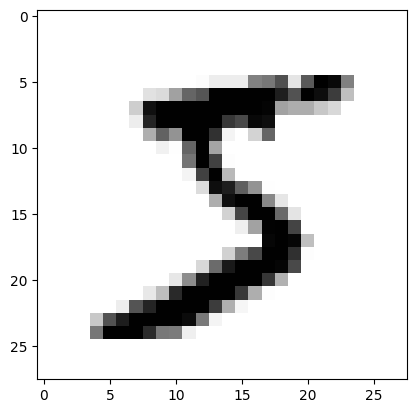

In [114]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

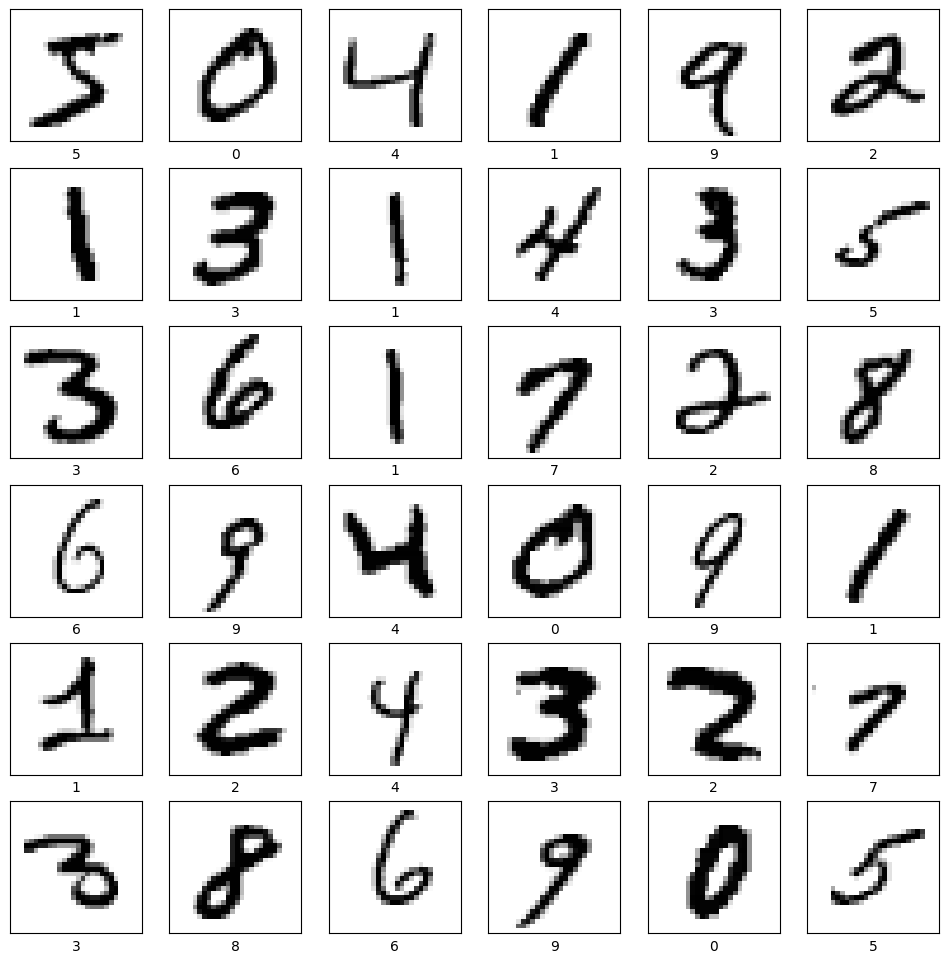

In [115]:
numbers_to_display = 36
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(12,12))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [116]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [117]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

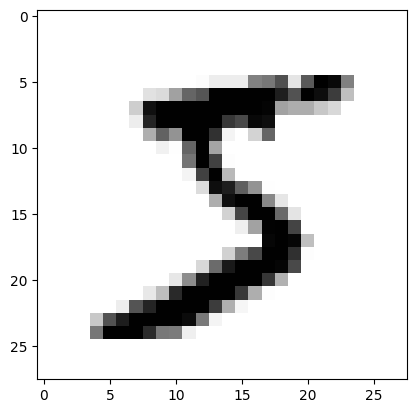

In [118]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

In [119]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train_normalized.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])


Here is our model summary so far.

In [120]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [121]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile the model

In [122]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.002)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [123]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=15,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.6811 - val_accuracy: 0.9600 - val_loss: 0.2785
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9595 - loss: 0.2715 - val_accuracy: 0.9663 - val_loss: 0.2235
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.2249 - val_accuracy: 0.9673 - val_loss: 0.2149
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9705 - loss: 0.1985 - val_accuracy: 0.9629 - val_loss: 0.2108
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9728 - loss: 0.1819 - val_accuracy: 0.9681 - val_loss: 0.1873
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9736 - loss: 0.1705 - val_accuracy: 0.9729 - val_loss: 0.1728
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9755 - loss: 0.1643 - val_accuracy: 0.9747 - val_loss: 0.1611
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9732 - loss: 0.1659 - 

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

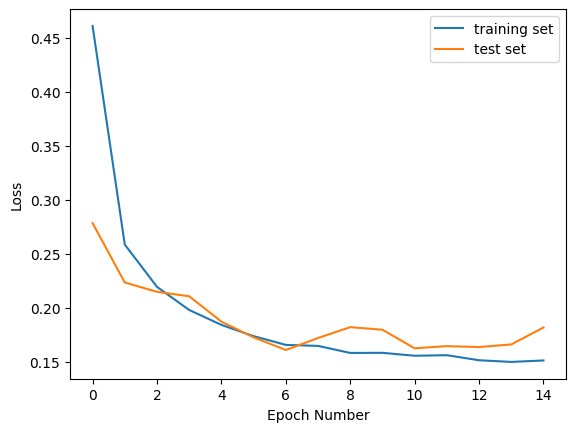

In [124]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

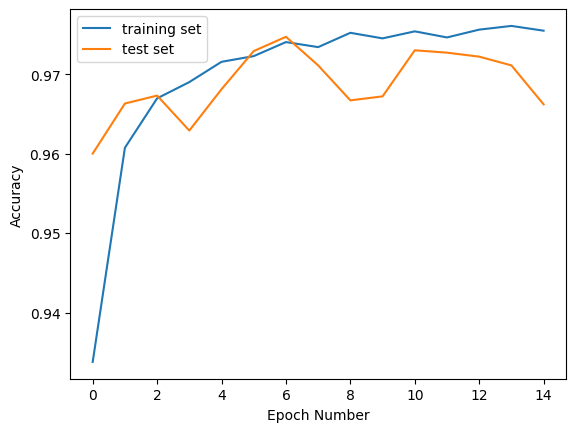

In [125]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [126]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [127]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1584048867225647
Training accuracy:  0.9732499718666077


### Test set accuracy

In [128]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [129]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.18189796805381775
Validation accuracy:  0.9661999940872192


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [130]:
# model_name = 'digits_recognition_mlp.h5'
# model.save(model_name, save_format='h5')

model_name = 'new_model.keras'
model.save(model_name, save_format='keras')

In [131]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [132]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step


In [133]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [134]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,8.811560e-06,1.767269e-05,1.303388e-03,1.537323e-03,1.485308e-07,3.238186e-05,3.110410e-09,9.950563e-01,6.075561e-05,1.983195e-03
1,2.210144e-05,9.067547e-03,9.266339e-01,6.329172e-02,5.462235e-09,2.093304e-04,1.335317e-05,1.173926e-05,7.504005e-04,9.860854e-10
2,9.366651e-07,9.995770e-01,3.987107e-05,1.221477e-06,5.999495e-05,2.419685e-06,7.235129e-05,8.308388e-05,1.628838e-04,2.881574e-07
3,9.976451e-01,1.130242e-05,1.238440e-03,1.621602e-04,9.407257e-06,3.047770e-04,8.907160e-05,8.515092e-05,5.399853e-05,4.006080e-04
4,3.106037e-05,2.470624e-07,2.095935e-04,8.670446e-06,6.653752e-01,5.049533e-06,3.118682e-05,1.719732e-04,6.616292e-05,3.341007e-01
...,...,...,...,...,...,...,...,...,...,...
9995,1.204988e-09,3.291017e-06,9.999889e-01,2.617180e-06,3.851278e-14,2.752734e-11,2.184513e-12,4.128824e-06,1.087586e-06,7.866850e-13
9996,3.364386e-10,3.898844e-07,2.062546e-07,9.999764e-01,2.619760e-11,2.097146e-05,1.893365e-13,5.583454e-08,3.624691e-07,1.617256e-06
9997,4.829968e-08,4.322105e-08,1.983452e-08,1.943835e-08,9.998546e-01,7.243726e-07,5.240263e-07,4.603433e-06,8.091542e-05,5.854010e-05
9998,4.399914e-06,3.548901e-07,3.958258e-09,1.056050e-06,1.019954e-09,9.999750e-01,2.921671e-06,2.142054e-06,1.408365e-05,4.047779e-08


In [135]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [136]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

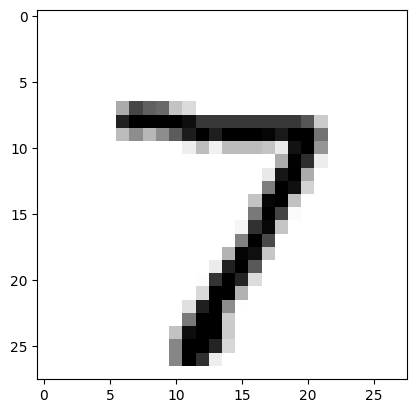

In [137]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

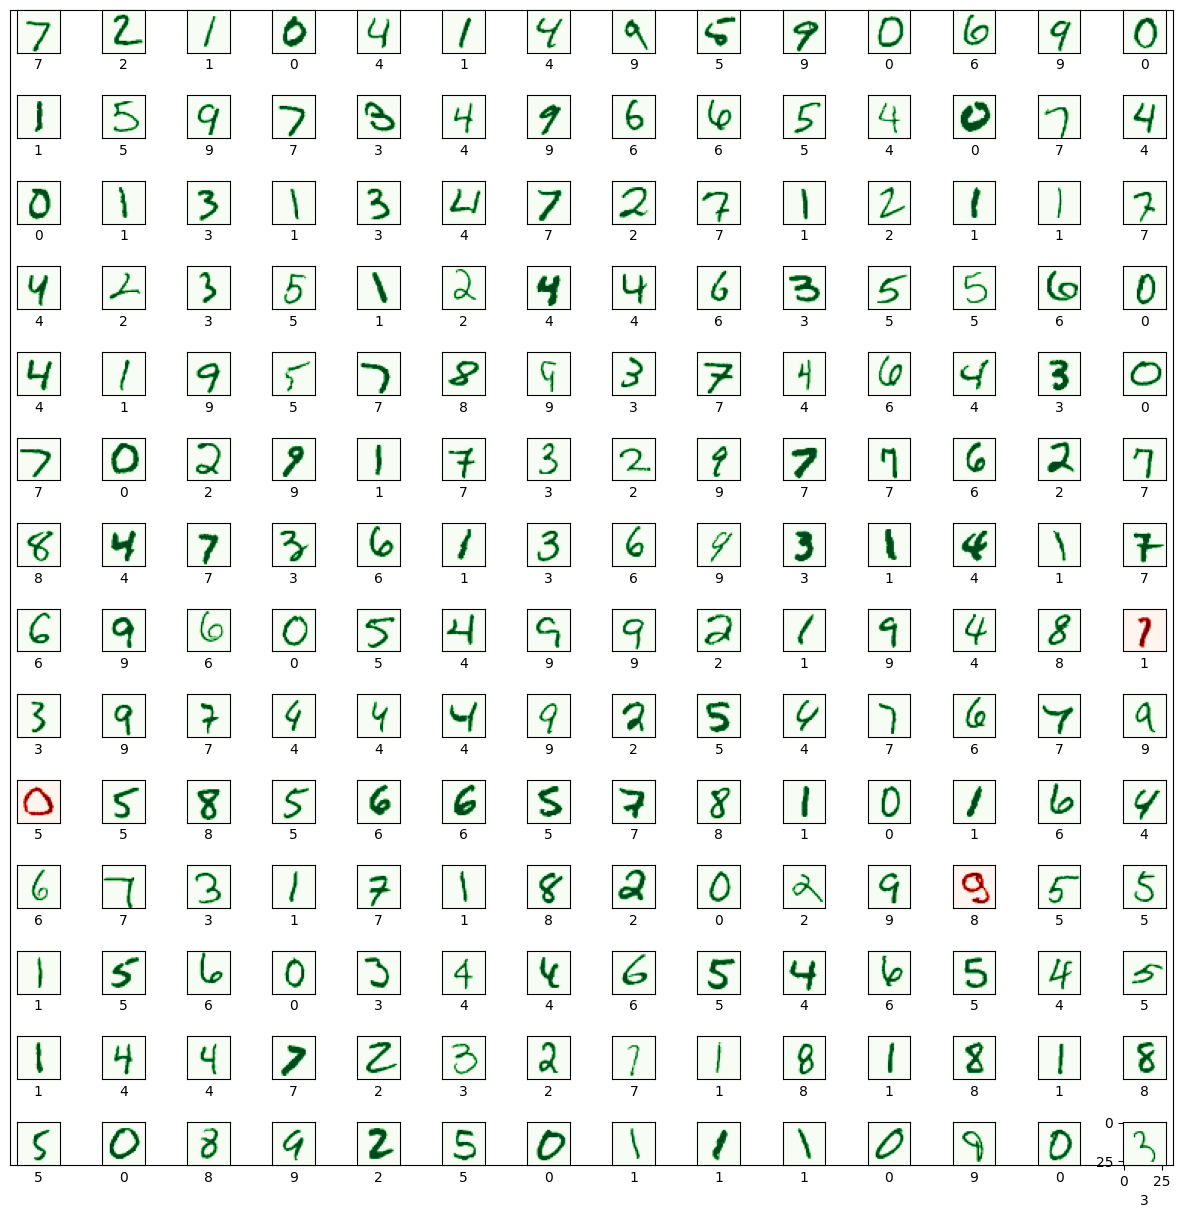

In [138]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

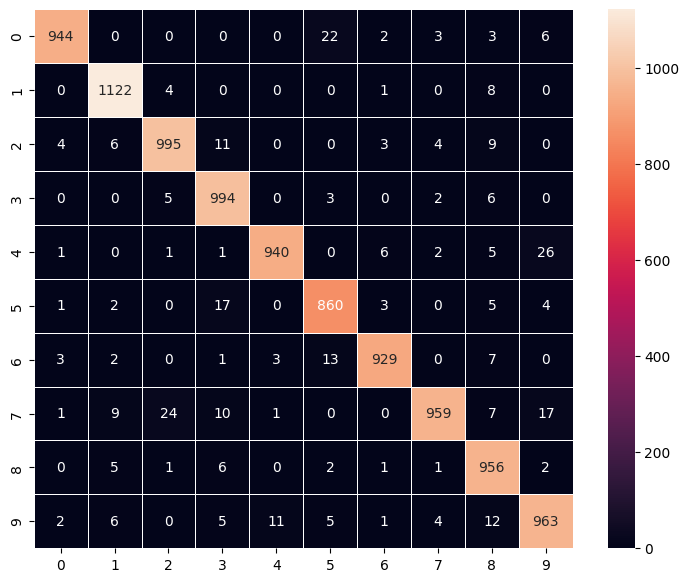

In [139]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()